In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy.special as sp
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import scipy.constants as cte

## Ecuacion Angular
$ Y_{l}^{k}(\theta,\phi)=\sqrt{\frac{(2l+1)(l-k)!}{4\pi(l+k)!}}e^{ik\theta}P_{l}^{K}(cos(\theta))\        \ \text{, siendo}\       \ A_{l}^{k} = \sqrt{\frac{(2l+1)(l-k)!}{4\pi(l+k)!}}$

## Ecuación radial 
$R(r)_{nl}=D_{nl}J_{l}(sr)$

## Coeficientes
$D_{nl}=\frac{1}{\int_{0}^{\infty} | J_{l}(sr) |r^{2}dr}$

## valor de s
$s=\frac{\sqrt{2mE}}{\hbar}$ o $s=\frac{\beta_{nl}}{a}$
## Energia

$E_{nl}=\frac{\hbar^{2}}{2ma^{2}}\beta_{nl}^{2}$ siendo $\beta_{nl}$ las raices de la funcion especial de Besell, osea $J_{l}(sa)=0$

In [224]:
def FUN_BESSEL(a,n,l):
    # n > 0
    # l => 0
#GRAFICA DE LA FUNCION DE BESELL Y SUS 'n' RAICES
#----------------------------------------------------------------------------------------------------------------------
    r = np.linspace(0,a,100)
    J_l = sp.jv(l, r) #Función de Besell 
    B_nl =sp.jn_zeros(l, n) # Numero de Raices de la funcion de Besell de grado l
    fig = plt.figure(figsize=(8,6))
    plt.plot(r,J_l)
    
    for i in range(len(B_nl)):
        plt.scatter(B_nl[i],0)

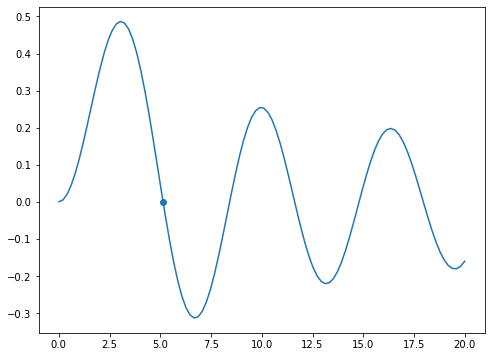

In [238]:
FUN_BESSEL(20,1,2)

In [226]:
def FuncionRadial(a,n,l):
    
    r = np.linspace(0,a,100)
    J_l = sp.jv(l, r) #Función de Besell 
    B_nl =sp.jn_zeros(l, n) # Numero de Raices de la funcion de Besell de grado l

#CALCULO DE LAS DIFERENTES VARIABLES COMO LO SON LA (E, s, D)
#---------------------------------------------------------------------------------------------------------------    

    E_nl=[] # Lista que contiene los valores de la eneergia para las n raices y l grado de la funcion de Besell
    for i in range(len(B_nl)):
        E = (B_nl[i]/a)**2  # h^2/2m =1
        E_nl.append(E)
    s_nl=[] #lista que contiene los valores de "s"  
    for i in range(len(B_nl)):
        s = (B_nl[i])/a
        s_nl.append(s)
    
    D_nl= [] # lista que contiene los valores de la constante de normalizacion
    for i in range(len(s_nl)):
        i_t = integrate.quad(lambda r: sp.jv(l, s_nl[i]*r)**2*r**2, 0, np.inf) 
        D = 1/i_t[0]
        D_nl.append(D)
    
#CALCULO DE LOS VALORES QUE TOMA LA FUNCION RADIAL APARTIR DE LOS PARAMETROS ANTERIORES
#------------------------------------------------------------------------------------------------------------
    R_nl = [] # lista de las funciones radiales 
    for i in range(len(s_nl)):
        R = D_nl[i]*sp.jv(l, s_nl[i]*r)
        R_nl.append(R)
    return(R_nl,E_nl)

In [239]:
def Grafica_fun_Radial(a,n,l):
    
    colores = ['black','dimgray','dimgrey','gray','grey','darkgray']
    colores1 = ['red','darkred','maroon','firebrick','brown','indianred']
    colores2 = ['midnightblue', 'navy', 'darkblue', 'mediumblue', 'blue',  'royalblue']
    r = np.linspace(0,a,100)
    R_nl,E_nl=FuncionRadial(a,n,l)

    x=np.linspace(-a,a,100)
    
    
    for i in range(0,len(R_nl)):
        if l% 2 == 0:
            plt.plot(r,(R_nl[i]/np.max(R_nl[i])+E_nl[i]), color = colores[i], label='R_' +str(i+1)+','+str(l))
            plt.plot(-np.flip(r), (np.flip(R_nl[i]/np.max(R_nl[i]))+E_nl[i]), color = colores[i])
            plt.plot(x,[E_nl[i] for j in range(0,len(x))], colores1[i],label='E_'+ str(i+1)+','+str(l))
        else:
            plt.plot(r,(R_nl[i]/np.max(R_nl[i])+E_nl[i]), colores[i],label='R_'+ str(i+1)+','+str(l))
            plt.plot(-np.flip(r),(-np.flip(R_nl[i]/np.max(R_nl[i]))+E_nl[i]), color = colores[i])
            plt.plot(x,[E_nl[i] for j in range(0,len(x))], colores1[i],label='E_'+ str(i+1)+','+str(l)) 

    plt.legend()
    plt.xlabel('Ancho del pozo')
    plt.ylabel('Energia')
    plt.show()

<ipython-input-226-4325f54d170e>:21: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  i_t = integrate.quad(lambda r: sp.jv(l, s_nl[i]*r)**2*r**2, 0, np.inf)


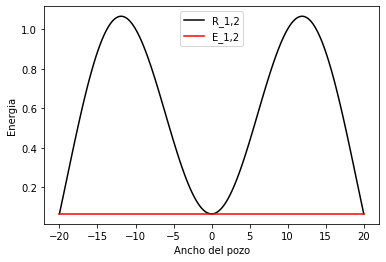

In [240]:
Grafica_fun_Radial(20,1,2)

In [232]:
def FO_Elec_cascaron(a,n,l,m):
    
    R_nl,E_nl = FuncionRadial(a,n,l)
    
#--------------------VALOR ABSOLUTO DE LA FUNCION DE ONDA AL CUADRADO PARA PARTICULA EN POTENCIAL ESFERICO---------------

    PHI, THETA = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j] #arrays de variables angulares
    FUN_ONDA =np.abs((R_nl[n-1]/np.max(R_nl[n-1]))*sp.sph_harm(m, l, PHI, THETA))**2 

    #A continuación convertimos a coordenadas cartesianas
    # para su representación 3D
    X = FUN_ONDA * np.sin(THETA) * np.cos(PHI)
    Y = FUN_ONDA * np.sin(THETA) * np.sin(PHI)
    Z = FUN_ONDA * np.cos(THETA)

#-----------------------------GRAFICA VALOR ABSOLUTO DE LA FUNCION DE ONDA AL CUADRADO ----------------------------------

    fig = plt.figure(figsize=(10,4))

    fig = plt.figure(constrained_layout=True,figsize=(7,6))
    spec2 = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

#===============
#  PRIMER subplot
#===============
# set up the axes for the first plot

    N = FUN_ONDA/FUN_ONDA.max() 
    ax = fig.add_subplot(spec2[0,0], projection='3d')
    im = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.hot_r(N),alpha=0.2)
    m = cm.ScalarMappable(cmap=cm.hot_r)
    m.set_array(FUN_ONDA)   
      
    ax.set_xlabel('X', fontsize = 8)
    ax.set_ylabel('Y', fontsize = 8)
    ax.set_zlabel('Z', fontsize = 8)
    ax.set_title('Función de Onda $|\psi_{r, \Theta, \phi}|^{2}$')

#===============
# SEGUNDO subplot
#===============
# set up the axes for the second plot
    ax = fig.add_subplot(spec2[0, 1], projection='3d')
       
    ax.contourf(X,Y,Z, zdir='z', offset=0, cmap=cm.hot)
    #ax.contour(X,Y,Z, zdir='z', offset=0, cmap=cm.hot,linewidths=3)
    

    ax.set_xlabel('X', fontsize = 8)
    ax.set_ylabel('Y', fontsize = 8)
    ax.set_zlabel('Z', fontsize = 8)
    m = cm.ScalarMappable(cmap=cm.hot)
    ax.set_title('Probabilidad $|\psi|^{2}$ en xy')

#===============
# TERCER subplot
#===============

    ax = fig.add_subplot(spec2[1, 0], projection='3d')

    ax.contourf(X, Y, Z, zdir='y', offset=0, cmap=cm.hot)
    #ax.contour(X, Y, Z, zdir='y', offset=0, cmap=cm.hot,linewidths=3)
    ax.set_xlabel('X', fontsize = 8)
    ax.set_ylabel('Y', fontsize = 8)
    ax.set_zlabel('Z', fontsize = 8)
    ax.set_title('Probabilidad $|\psi|^{2}$ en z')

#===============
# CUARTO subplot
#===============

    ax = fig.add_subplot(spec2[1, 1], projection='3d')

    ax.contourf(X, Y, Z, zdir='x', offset=0, cmap=cm.hot)
    #ax.contour(X, Y, Z, zdir='x', offset=0, cmap=cm.hot,linewidths=3)
    ax.set_xlabel('X', fontsize = 8)
    ax.set_ylabel('Y', fontsize = 8)
    ax.set_zlabel('Z', fontsize = 8)
    ax.set_title('Probabilidad $|\psi|^{2}$ en zx')
    fig.colorbar(m, shrink=0.8);

<ipython-input-226-4325f54d170e>:21: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  i_t = integrate.quad(lambda r: sp.jv(l, s_nl[i]*r)**2*r**2, 0, np.inf)


<Figure size 720x288 with 0 Axes>

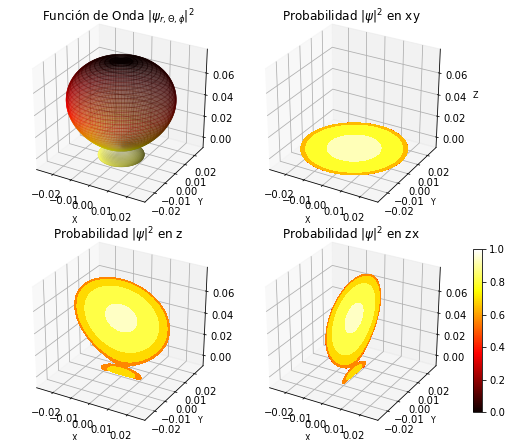

In [242]:
FO_Elec_cascaron(20,2,0,0)

In [9]:
def PROB_FUN_OND_ELEC_CAS(a,n,l,m):
# l Grado del armónico esférico
# m Orden  del grado esferico
# n Estado 
    
    R_nl,E_nl = FuncionRadial(a,n,l)
# DENSIDAD DE PROBABILIDAD DE LA FUNCION DE ONDA PSI

    fig = plt.figure(figsize=(5,4))

    PHI, THETA = np.mgrid[0:2*np.pi:100j, 0:np.pi:100j] #arrays de variables angulares
    Y = np.abs(sp.sph_harm(m, l, PHI, THETA))**2 #Array de valores absolutos de Ymn
    YX = Y * np.sin(THETA) * np.cos(PHI)
    YY = Y * np.sin(THETA) * np.sin(PHI)
    YZ = Y * np.cos(THETA)

    r = np.linspace(0,a,100)
    for i in range(0,len(r)):
        plt.plot(r[i] * YY[1], r[i] * YZ[1], 'k', color = 'r', alpha = (1/(max(R_nl[n-1]))) * abs(R_nl[n-1][i]))
        plt.plot(-r[i] * YY[1], r[i] * YZ[1], 'k',color = 'r', alpha = (1/(max(R_nl[n-1]))) * abs(R_nl[n-1][i]))


<ipython-input-226-4325f54d170e>:21: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  i_t = integrate.quad(lambda r: sp.jv(l, s_nl[i]*r)**2*r**2, 0, np.inf)


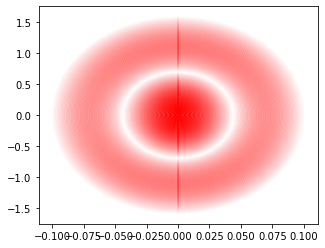

In [247]:
PROB_FUN_OND_ELEC_CAS(20,2,0,0)

In [11]:
def FO_ATO_HIDROGENO(a,n,l,m):
    # l < n 
#---------------------------------------FUNCION RADIAL ATOMO DE HIDROGENO-----------------------------------------
    a0 = 1
    r = np.linspace(0,a,100)
    rho = rho = (2 * r) / (n * a0) #
 

    N = np.sqrt((np.math.factorial(n-l-1)/(2* n* np.math.factorial(n+l))) * (2/(n *a0)) ** 3)
    R = N  * sp.assoc_laguerre(rho,n-l-1,2*l+1) * (rho ** l) * np.exp(- (rho / 2))

#---------------------------------------FUNCION DE ONDA PARA EL ATOMO DE HIDROGENO-------------------------------------     
    #THETA = np.linspace(0,np.pi,100)
    #PHI = np.linspace(0,2*np.pi, 100)
    PHI, THETA = np.mgrid[0:2*np.pi:100j, 0:np.pi:100j] #arrays de variables angulares
    FUN_ONDA =np.abs((R/np.max(R))*sp.sph_harm(m, l, PHI, THETA))**2

#A continuación convertimos a coordenadas cartesianas
# para su representación 3D
    X = FUN_ONDA * np.sin(THETA) * np.cos(PHI)
    Y = FUN_ONDA * np.sin(THETA) * np.sin(PHI)
    Z = FUN_ONDA * np.cos(THETA)
    
#----------------------------------------GRAFICO DE LA FUNCION DE ONDA -------------------------------------------------


    fig = plt.figure(figsize=(10,4))
    fig = plt.figure(constrained_layout=True,figsize=(7,6))
    spec2 = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

#===============
#  PRIMER subplot
#===============
# set up the axes for the first plot

    N = FUN_ONDA/np.max(FUN_ONDA)
    ax = fig.add_subplot(spec2[0,0], projection='3d')
    im = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.hot(N),alpha=0.2)
    im = ax.plot_surface(X, Y, -Z, rstride=1, cstride=1, facecolors=cm.hot(N),alpha=0.2)
    m = cm.ScalarMappable(cmap=cm.hot)
    m.set_array(FUN_ONDA)   
     
    ax.set_xlabel('X', fontsize = 8)
    ax.set_ylabel('Y', fontsize = 8)
    ax.set_zlabel('Z', fontsize = 8)
    ax.set_title('Función de Onda $|\psi_{r, \Theta, \phi}|^{2}$')

#===============
# SEGUNDO subplot
#===============
# set up the axes for the second plot
    ax = fig.add_subplot(spec2[0, 1], projection='3d')

    ax.contourf(X,Y,Z, zdir='z', offset=0, cmap=cm.hot)
    #ax.contour(X,Y,Z, zdir='z', offset=0, cmap=cm.hot,linewidths=1)

    ax.set_xlabel('X', fontsize = 8)
    ax.set_ylabel('Y', fontsize = 8)
    ax.set_zlabel('Z', fontsize = 8)
    m = cm.ScalarMappable(cmap=cm.hot)
    ax.set_title('Función de Onda $|\psi|^{2}$ en xy')

#===============
# TERCER subplot
#===============

    ax = fig.add_subplot(spec2[1, 0], projection='3d')

    ax.contourf(X, Y, Z, zdir='y', offset=0, cmap=cm.hot)
    ax.contourf(X, Y, -Z, zdir='y', offset=0, cmap=cm.hot)
    #ax.contour(X, Y, Z, zdir='y', offset=0, cmap=cm.hot,linewidths=4)
    ax.set_xlabel('X', fontsize = 8)
    ax.set_ylabel('Y', fontsize = 8)
    ax.set_zlabel('Z', fontsize = 8)

    ax.set_title('Función de Onda $|\psi|^{2}$ en zy')
#===============
# CUARTO subplot
#===============

    ax = fig.add_subplot(spec2[1, 1], projection='3d')

    ax.contourf(X, Y, Z, zdir='x', offset=0, cmap=cm.hot)
    ax.contourf(X, Y, -Z, zdir='x', offset=0, cmap=cm.hot)
    #ax.contour(X, Y, Z, zdir='x', offset=0, cmap=cm.hot,linewidths=1)

    ax.set_xlabel('X', fontsize = 8)
    ax.set_ylabel('Y', fontsize = 8)
    ax.set_zlabel('Z', fontsize = 8)
    ax.set_title('Función de Onda $|\psi|^{2}$ en zx')
    
    fig.colorbar(m, shrink=0.8);

<Figure size 720x288 with 0 Axes>

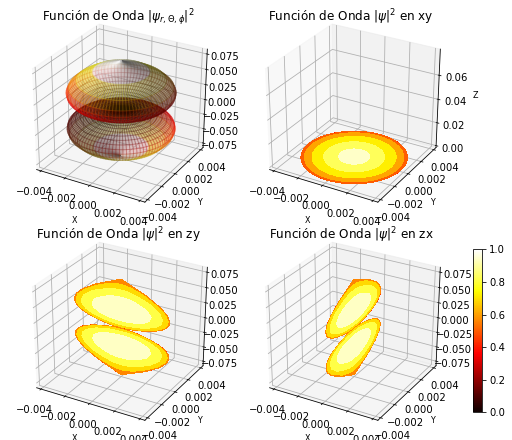

In [249]:
FO_ATO_HIDROGENO(12,1,0,0)

In [13]:
def PROB_FUN_OND_Ato_HID(a,n,l,m):
# l Grado del armónico esférico
# m Orden  del grado esferico
# n Estado 
#---------------------------------------FUNCION RADIAL ATOMO DE HIDROGENO-----------------------------------------
    a0 = 1
    r = np.linspace(0,a,100)
    rho = rho = (2 * r) / (n * a0) #
 

    N = np.sqrt((np.math.factorial(n-l-1)/(2* n* np.math.factorial(n+l))) * (2/(n*a0)) * 3)
    R = N  * sp.assoc_laguerre(rho,n-l-1,2*l+1) * (rho ** l) * np.exp(- (rho / 2))

# DENSIDAD DE PROBABILIDAD DE LA FUNCION DE ONDA PHI PARA ATOMO DE HIDROGENO

#--------------------------------------------------------------------------------------------------------------------------
    fig = plt.figure(figsize=(5,4))
    PHI, THETA = np.mgrid[0:2*np.pi:100j, 0:np.pi:100j] #arrays de variables angulares
    Y = np.abs(sp.sph_harm(m, l, PHI, THETA))**2 #Array de valores absolutos de Ymn
    
    YX = Y * np.sin(THETA) * np.cos(PHI)
    YY = Y * np.sin(THETA) * np.sin(PHI)
    YZ = Y * np.cos(THETA)

    
    for i in range(0,len(r)):
        plt.plot(r[i] * YY[1], r[i] * YZ[1], 'k', color = 'r', alpha = (1/(max(R))) * abs(R[i]))
        plt.plot(-r[i] * YY[1], r[i] * YZ[1], 'k',color = 'r', alpha =(1/(max(R))) * abs(R[i]))



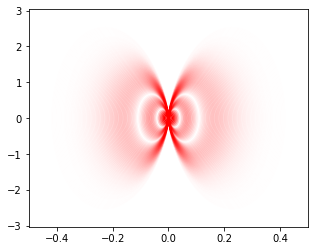

In [14]:
PROB_FUN_OND_Ato_HID(60,4,1,1)
